<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/taca/blob/main/ref/geron/chap_2/4_visualize/2_correlations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/marco-canas/taca/blob/main/ref/geron/chap_2/4_visualize/2_correlations.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

# [seaborn.scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)

## [Video de apoyo]() 

`seaborn.scatterplot(*, x=None, y=None, hue=None, style=None, size=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, x_bins=None, y_bins=None, units=None, estimator=None, ci=95, n_boot=1000, alpha=None, x_jitter=None, y_jitter=None, legend='auto', ax=None, **kwargs)`

Dibuja un diagrama de dispersión con posibilidad de varias agrupaciones semánticas.

Los parámetros controlan qué semantica visual se utiliza para identificar los diferentes subconjuntos de datos. 

Los parámetros para semantica redundante son:
* x
* y
* hue
* size
* style
* data


El diagrama de dispersión es un pilar de la visualización estadística. 

Representa la distribución conjunta de dos variables utilizando una nube de puntos, donde cada punto representa una observación en el conjunto de datos. 

Esta representación permite al ojo inferir una cantidad sustancial de información sobre si existe alguna relación significativa entre ellos.

Cuando las variables a relacionar son numéricas, la función adecuada para crear un diagrama de dispersión es scatterplot de seaborn. 

In [1]:
import seaborn as sns


In [2]:
sns.get_dataset_names() 

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [3]:
tips = sns.load_dataset('tips')

In [6]:
tips.head() 

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
tips.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


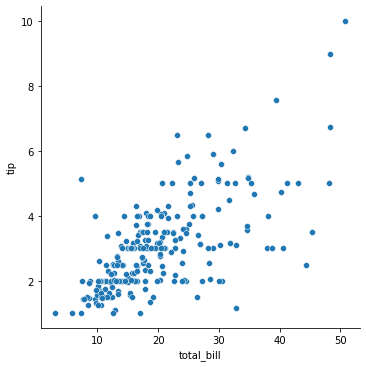

In [11]:
sns.relplot(x = 'total_bill', y = 'tip', data = tips, marker = 'o');    

Mientras que los puntos se trazan en dos dimensiones, se puede agregar otra dimensión a la gráfica coloreando los puntos de acuerdo con una tercera variable. 

En Seaborn, esto se conoce como el uso de un "hue semantic" (tomo semántico), porque el color del punto gana significado:

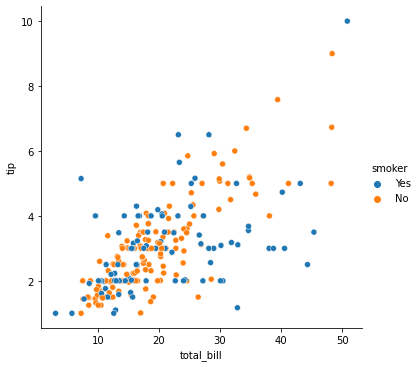

In [12]:
sns.relplot(x = 'total_bill', y = 'tip', hue = 'smoker', data = tips); 

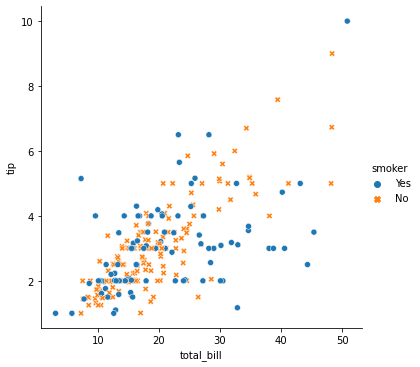

In [14]:
sns.relplot(x = 'total_bill', y = 'tip', hue = 'smoker', style = 'smoker', data = tips);


También es posible representar cuatro variables cambiando el tono y el estilo de cada punto de forma independiente. 

Pero esto debe hacerse con cuidado, porque el ojo es mucho menos sensible a la forma que al color:

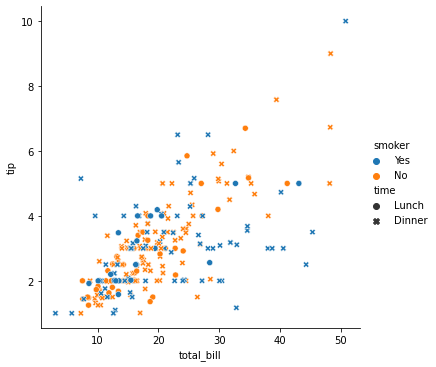

In [15]:
sns.relplot(x = 'total_bill', y = 'tip', hue = 'smoker', style = 'time', data = tips); 

En los ejemplos anteriores, la semántica del tono (`hue`) era categórica, por lo que se aplicó la paleta cualitativa predeterminada. 

Si la semántica de tono (`hue`) es numérica (específicamente, si se puede fundir para flotar), la coloración predeterminada cambia a una paleta secuencial:

In [16]:
tips['size'].unique() 

array([2, 3, 4, 1, 6, 5], dtype=int64)

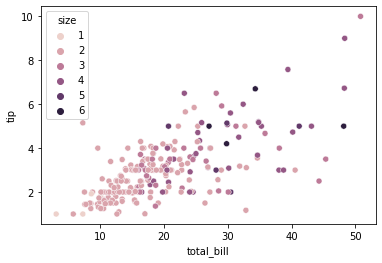

In [20]:
sns.scatterplot(x = 'total_bill', y = 'tip', hue = 'size', data = tips); 

El tercer tipo de variable semántica cambia el tamaño de cada punto:

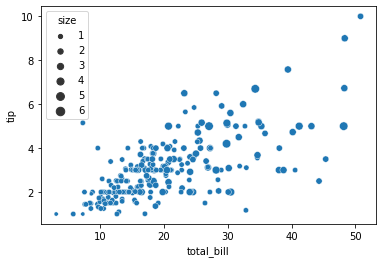

In [19]:
sns.scatterplot(x = 'total_bill', y = 'tip', size = 'size', data = tips);

Más ejemplos para personalizar cómo se utilizan las diferentes semánticas para mostrar relaciones estadísticas se muestran en los ejemplos de API [scatterplot()](https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot).



# Enfatizar la continuidad con los diagramas de línea

Los diagramas de dispersión son altamente efectivos, pero no existe un tipo de visualización universalmente óptimo. 

En su lugar, la representación visual debe adaptarse a los detalles del conjunto de datos y a la pregunta que está tratando de responder con la gráfica.

Con algunos conjuntos de datos, es posible que desee comprender los cambios en una variable en función del tiempo o una variable continua similar. 

En esta situación, una buena opción es dibujar una línea poligonal. 

En Seaborn, esto se puede lograr mediante la función `lineplot()`, ya sea directamente o con `relplot()` estableciendo:`kind="line"`

In [21]:
import numpy as np 
import pandas as pd 

df = pd.DataFrame(dict(time = np.arange(500), value = np.random.randn(500).cumsum()))

In [22]:
df.head() 

,time,value
0,0,-0.595418
1,1,-0.700448
2,2,0.164163
3,3,0.295567
4,4,-0.094788


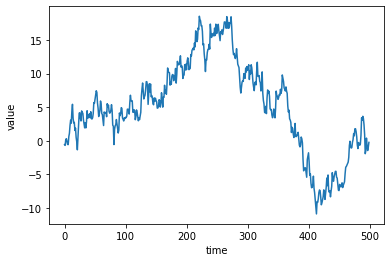

In [27]:
import matplotlib.pyplot as plt 

sns.lineplot(x = 'time', y = 'value', data = df);

plt.savefig('funcion_del_tiempo.jpg')
plt.show() 

## Referentes  
* https://seaborn.pydata.org/generated/seaborn.scatterplot.html
* 